In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
zomato_data = pd.read_csv("zomato.csv", encoding='latin1')
country_data = pd.read_excel("Country-Code.xlsx")

In [6]:
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
country_data = pd.read_excel("Country-Code.xlsx")
country_data.head(10)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


### Data Preprocessing 

### 1. Data Cleaning

### 2. EDA (Analysis)

### 3. Finding and Treating Outliers (if any)

### 4. Feature Selection for model building

### 5. Model Building

### 6. Hyperparameter tuning



In [7]:
# Merge Zomato data with Country code data on 'Country Code'
data = zomato_data.merge(country_data, on='Country Code', how='left')

In [8]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [13]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [14]:
data.dropna()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [15]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [16]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [25]:
data['City'] = le.fit_transform(data['City'])
data['Cuisines'] = le.fit_transform(data['Cuisines'])
data['Currency'] = le.fit_transform(data['Currency'])

In [29]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

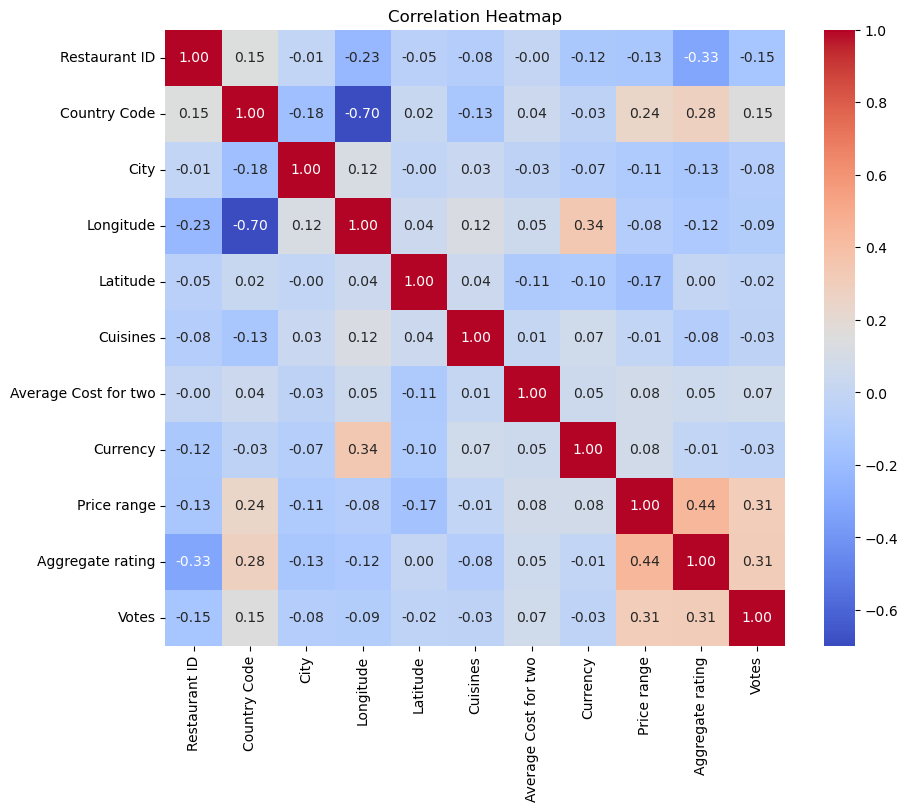

In [28]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
X_reg = data[['City', 'Cuisines', 'Votes', 'Price range', 'Aggregate rating']]
y_reg = data['Average Cost for two']

In [31]:
scaler = StandardScaler()

In [32]:
X_regst = scaler.fit_transform(X_reg)

In [36]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regst,y_reg, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# Initialize regression models
lr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)

In [39]:
# List of models
models = {'Linear Regression': lr, 'Decision Tree Regressor': dtr, 'Random Forest Regressor': rfr}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    print(f'{name}:\nMSE: {mse:.2f}, R-squared: {r2:.2f}\n')

Linear Regression:
MSE: 378683910.59, R-squared: 0.01

Decision Tree Regressor:
MSE: 191872091.82, R-squared: 0.50

Random Forest Regressor:
MSE: 226969776.47, R-squared: 0.40



In [40]:
#Hyperparameter tuning on RandomForest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

grid_search = GridSearchCV(rfr, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_reg, y_train_reg)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test_reg)
mse_best = mean_squared_error(y_test_reg, y_pred_best)
r2_best = r2_score(y_test_reg, y_pred_best)

print(f'Best model MSE: {mse_best}')
print(f'Best model R2 Score: {r2_best}')

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best model MSE: 200755075.8608421
Best model R2 Score: 0.473267699061134


In [54]:
#Hyperparameter tuning on Decision Tree
param_grid = {
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(dtr, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_reg, y_train_reg)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test_reg)
mse_best = mean_squared_error(y_test_reg, y_pred_best)
r2_best = r2_score(y_test_reg, y_pred_best)

print(f'Best model MSE: {mse_best}')
print(f'Best model R2 Score: {r2_best}')

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best model MSE: 166715903.38229036
Best model R2 Score: 0.5625781763419713


In [42]:
X_class = data[['City', 'Cuisines', 'Votes', 'Aggregate rating', 'Average Cost for two']]
y_class = data['Price range']

In [45]:
X_classt = scaler.fit_transform(X_class)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [48]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classt, y_class, test_size=0.2, random_state=42)

In [49]:
# Initialize classification models
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [50]:
# List of classification models
classification_models = {'Logistic Regression': lr_clf, 'Decision Tree Classifier': dt_clf, 'Random Forest Classifier': rf_clf}

# Train and evaluate classification models
for name, model in classification_models.items():
    model.fit(X_train_clf, y_train_clf)
    y_pred_clf = model.predict(X_test_clf)
    accuracy = accuracy_score(y_test_clf, y_pred_clf)
    print(f'{name}:\nAccuracy: {accuracy:.2f}')
    print(f'Classification Report:\n{classification_report(y_test_clf, y_pred_clf)}\n')

Logistic Regression:
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.94      0.81       907
           2       0.58      0.51      0.54       618
           3       0.50      0.33      0.40       266
           4       0.67      0.02      0.03       120

    accuracy                           0.66      1911
   macro avg       0.62      0.45      0.45      1911
weighted avg       0.64      0.66      0.62      1911


Decision Tree Classifier:
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       907
           2       0.97      0.98      0.98       618
           3       0.92      0.91      0.91       266
           4       0.83      0.83      0.83       120

    accuracy                           0.97      1911
   macro avg       0.93      0.93      0.93      1911
weighted avg       0.97      0.97      0.97      1911


Rando

In [51]:
#Hyperparameter tuning on RandomForest Classifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_clf, y_train_clf)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test_clf)
acc_best = accuracy_score(y_test_clf, y_pred_best)

print(f'Best model Accuracy: {acc_best}')

Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best model Accuracy: 0.957613814756672


# Zomato Restaurant Data Analysis Project

## Overview
The goal of this project is to analyze Zomato restaurant data to predict the average cost for two people and classify the price range of restaurants based on various features. The dataset includes restaurant details, ratings, votes, and country information.

## Steps Involved:

### 1. Data Preprocessing
- **Loading the Data**: Imported Zomato restaurant data and country codes from CSV and Excel files, respectively.
- **Merging Datasets**: Merged Zomato data with country code data on the 'Country Code' column to enrich the dataset.

### 2. Data Cleaning
- **Missing Values**: Checked for missing values and dropped any rows with missing data.
- **Data Type Conversion**: Converted categorical variables like 'City', 'Cuisines', and 'Currency' into numerical format using label encoding.

### 3. Exploratory Data Analysis (EDA)
- **Statistical Summary**: Used descriptive statistics to understand the dataset.
- **Correlation Analysis**: Created a heatmap to visualize correlations between numeric features.

### 4. Feature Selection
- **Regression Task**: Selected features for predicting 'Average Cost for two', including 'City', 'Cuisines', 'Votes', 'Price range', and 'Aggregate rating'.
- **Classification Task**: Selected features for predicting 'Price range', including 'City', 'Cuisines', 'Votes', 'Aggregate rating', and 'Average Cost for two'.

### 5. Model Building
- **Regression Models**: Implemented three regression models:
  - Linear Regression
  - Decision Tree Regressor
  - Random Forest Regressor
- **Model Evaluation**: Evaluated model performance using Mean Squared Error (MSE) and R-squared metrics.

### 6. Hyperparameter Tuning
- **Random Forest Regressor**: Tuned hyperparameters using Grid Search to find optimal values for `n_estimators`, `max_depth`, and `min_samples_split`.
- **Decision Tree Regressor**: Similarly tuned hyperparameters for the decision tree model.

### 7. Classification Task
- **Classification Models**: Implemented three classification models:
  - Logistic Regression
  - Decision Tree Classifier
  - Random Forest Classifier
- **Model Evaluation**: Evaluated models using accuracy and classification reports.

### 8. Hyperparameter Tuning for Classification
- **Random Forest Classifier**: Tuned hyperparameters using Grid Search for optimal classification performance.

## Results
- Presented MSE and R-squared values for regression models and accuracy scores for classification models.
- Displayed best parameters found through hyperparameter tuning for both regression and classification models, along with their performance metrics.
